In [ ]:
from IPython.display import display, Markdown, Latex
from decimal import Decimal
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from IPython.display import display
from scipy.integrate import odeint #library with ODE solving tools

# Nuclear Energy Physics solutions (sets-4,5,6), copyright Mateusz Kmieć 

# SET 4

## Problem 4.1

#### Absorption of neutrons in the fuel, U-235 + U-238, leads in some cases to fission which gives new fast neutrons.

$\textbf{Derive}$ the formula for $\eta$, the effective number of fission neutrons per one neutron absorbed in fuel.

(1) $$\eta=\nu_{235}\frac{e\sigma_{f235}}{e\left(\sigma_{f}+\sigma_{c}\right)_{235}+(1-e)\sigma_{a238}}.$$

the enrichment $e$,

(2) $$e=\frac{N_{235}}{N_{235}+N_{238}}.$$

$\textbf{Deriviation}$ of formula (1) (so called thermal fission factor).

First, let us make an assumption that the chain reaction is occuring in an infinitely large system.
This assumption results in no neutron leakage, which indicates that the effective probability of chain reaction is governed only by the respective capture and fission cross-sections.

By definition thermal fission factor can be interpreted as:

(3) $$\eta=\frac{\text{number of fast neutrons produced in thermal fission}}{\text{number of thermal neutrons absorbed in fuel}}.$$

According to Chapter.9 of the book, written by WG, which shall not be named here,
fission caused by thermal neutrons occurs only for $U^{235}$ nuclei in $U^{235}+U^{238}$ fuel. 

Consequently, thermal fission factor can be expressed as:
    
(4) $$\eta=\nu_{235}\frac{\text{number of thermal neutrons that fissioned}}{\text{number of thermal neutrons absorbed in fuel}},$$

where $\nu_{235}$ denotes the number of neutrons produced per fisson of $U^{235}$ nuclei.

In the light of the aforementioned definitions, the number of thermal neutrons that fissioned can be expressed as a product of the uranium enrichement ($e$) and the cross-section for $U^{235}$ fission at $0.0253$ eV ($\sigma_{f235}$). 

As far as the denominator of (4) is concerned it can be written as $e\left(\sigma_{f}+\sigma_{c}\right)_{235}+\left(1-e\right)\sigma_{a238}$. At this point it is worth noting that $\sigma_{a238}\approx\sigma_{c238}$ as fission for thermal neutrons is negligible for $U^{238}$.

Having found the number of thermal neutrons that fissioned and the number of thermal neutrons absorbed in fuel we can finally obtain equation (1) from equation (4).

$\textbf{QED}$

a). $\textbf{Study}$ how the fission factor depends on the enrichement and determine the value at an erichment of $0.7$, $1$, $2$ ,$3\%$.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

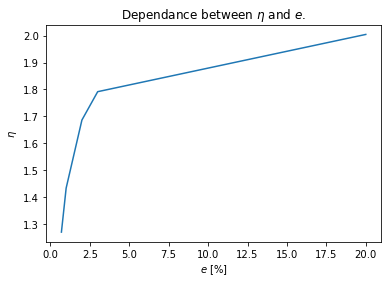

In [11]:
nu235=2.42                              #information fount in chapter.9
e=np.array([0.7,1.0,2.0,3,20])          #enrichment in percent


sigmaf235=539                           #cross section U-235 capture chapter 9
sigmac235=101                           #cross-section U-235 capture chapter 9
sigmac238=2.72                          #cross-section U-238 capture chapter 9

#eta calculated for 0.7, 1, 2 and 3% enrichment
eta=nu235*((e*sigmaf235)/(e*(sigmaf235+sigmac235)+(100-e)*sigmac238))

display(Math(r"\text{Chain reaction is established for } \ \eta \ \text{equal:}"))
for i in range(5):
    display(Math(r'\\ \eta= {:.2f}; \ \ e={:.2f}\%,'.format(eta[i],e[i])))
    
display(Math(r"\text{where we assume no leakage. The result is in accordance with the result from chapter 9!}"))

plt.plot(e,eta)
plt.title("Dependance between $\eta$ and $e$.")
plt.xlabel("$e$ [%]")
plt.ylabel("$\eta$")
plt.show()

b). $\textbf{Calculate}$ the value of the fission factor, for highly enriched uranium and plutonium fissioned by thermal and fast neutrons.

Uranium with a content of U-235 larger or equal to $20\%$ is called highly enriched uranium. That is why from now on I will be using $e=20\%$.

(5) $$\eta=\frac{e\nu_{235}\sigma_{ff235}+(1-e)\nu_{238}\sigma_{ff238}}{e\left(\sigma_{ff}+\sigma_{c}\right)_{235}+(1-e)(\sigma_{c238}+\sigma_{ff238})}.$$

Data taken from

https://www.nuclear-power.net/nuclear-power/reactor-physics/nuclear-fission-chain-reaction/fast-fission-factor/#:~:text=The%20fast%20fission%20factor%20is,neutrons%20produced%20in%20thermal%20fission.&text=This%20arrangement%20increases%20the%20probability,be%20with%20a%20fuel%20nucleus.

In [12]:
e=20

nu235=2.63                              #information from nuclear-power.net
nu238=2.60                              #information from nuclear-power.net

sigmaff238=0.6                          #fast cross section U-235 capture chapter 9
sigmaff235=1.3                          #fast cross section U-235 capture chapter 9

sigmac238=0.07
sigmac235=0.09

#epsilon calculated for 20% enrichment
eta=((e*nu235*sigmaff235)+(100-e)*nu238*sigmaff238)/(e*(sigmaff235+sigmac235)+(100-e)*(sigmac238+sigmaff238))

display(Math(r"\eta \text{ for 20% enriched U-235:}"))
display(Math(r"\eta= {:.4f}.".format(eta)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
e=20 

nu239=3.16                              #information from nuclear-power.net
nu238=2.60                              #information from nuclear-power.net 

sigmaff238=0.6                          #fast cross section U-235 capture chapter 9
sigmaff239=1.3                          #fast cross section U-235 capture chapter 9

sigmac238=0.07
sigmac239=0.05

#epsilon calculated for 20% enrichment
eta=((e*nu239*sigmaff239)+(100-e)*nu238*sigmaff238)/(e*(sigmaff239+sigmac239)+(100-e)*(sigmac238+sigmaff238))

display(Math(r"\eta \text{ for 20% enriched Pu-239:}"))
display(Math(r"\eta= {:.4f}.".format(eta)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Fission factor for fast neutrons:

(5) $$\epsilon=\frac{\text{number of fast neutrons produced by fissions of all energies}}{\text{number of fast neutrons produced in thermal fission}}.$$

(6) $$\epsilon=\frac{(e\nu_{235}\sigma_{f235}+e\sigma_{ff235}+(1-e)\nu_{238}\sigma_{ff238})}{e\nu_{235}\sigma_{f235}}$$



In [5]:
#Neutrons produced by fission in U have an average energy of 2 MeV and at this energy
#the significant cross-sections are:



nu235=2.63                              #information from nuclear-power.net
nu238=2.60                              #information from nuclear-power.net 
e=20                                    #enrichment in percent

sigmaff238=0.6                          #fast cross section U-235 capture chapter 9
sigmaff235=1.3                          #fast cross section U-235 capture chapter 9
sigmaf235=539                           #fission cross section U-235 capture chapter 9


#epsilon calculated for 20% enrichment
epsilon=(e*nu235*(sigmaf235+sigmaff235)+(100-e)*nu238*sigmaff238)/(e*nu235*sigmaf235)

display(Math(r'\\ \epsilon= {:.6f}; \ \ e={:.6f}\%,'.format(epsilon,e)))

<IPython.core.display.Math object>

We can repeat this calculation for plutonium.

In [6]:
#Neutrons produced by fission in Pu have an average energy of 2 MeV and at this energy
#the significant cross-sections are:



nu239=3.16                              #information from nuclear-power.net
nu238=2.60                              #information from nuclear-power.net 
e=20                                    #enrichment in percent

sigmaff238=0.6                          #fast cross section U-235 capture chapter 9
sigmaff239=1.93                         #fast cross section Pu-239 capture chapter 9
sigmaf239=747                           #fission cross section Pu-239 capture chapter 9

#epsilon calculated for 20% enrichment
epsilon=(e*nu239*(sigmaf239+sigmaff239)+(100-e)*nu238*sigmaff238)/(e*nu239*sigmaf239)

display(Math(r'\\ \epsilon= {:.6f}; \ \ e={:.6f}\%,'.format(epsilon,e)))

<IPython.core.display.Math object>

## Problem 4.2

Stainless steel, type $304$ having a density of $\rho=7.86 g/cm^{3}$ , has been used in some reactors. The
nominal composition by weight of this material is as follows: carbon, $0.08\%$;
chromium, $19\%$; nickel, $10\%$; iron, the remainder. Calculate the macroscopic absorption
cross-section of $\text{SS-304}$ at $0.0253$ eV.

$\textbf{Given}$

* Density, $\rho = 7.86 g/cm^{3}$;
* Weight fraction of carbon, $w_{C} = 0.08\%$;
* Weight fraction of chromium, $w_{Cr} = 19\%$;
* Weight fraction of nickel, $w_{Ni} = 10\%$;
* Weight fraction of iron, $w_{Fe} = 100\% - w_{C} - w_{Cr} - w_{Ni}$.

$\textbf{Data that might be useful}$
* Avogadro’s number, $N_{A} = 6.02214076\cdot10^{23} a/mol$ (exact);
* Carbon molar mass, $M_{C} = 12.01115 g/mol$;
* Chromium molar mass, $M_{Cr} = 51.996 g/mol$;
* Nickel molar mass, $M_{Ni} = 58.71 g/mol$;
* Iron molar mass, $M_{Fe} = 55.847 g/mol$;
* Microscopic absorption cross-sections at $0.0253 eV$:
- Carbon: $\sigma_{a,C} = 0.0034b$;
- Chromium, $\sigma_{a,Cr} = 3.1 b$;
- Nickel, $\sigma_{a,Ni} = 4.43 b$;
- Iron, $\sigma_{a,Fe} = 2.55 b$;

The macroscopic cross-section, $\Sigma$, is the probability that a particular type of interaction will occur per unit path length.

(7) $$\Sigma=\sum_{i}N_{i}\sigma_{i}=\sum_{i}\frac{\rho_{i}N_{A}}{M_{i}}\sigma_{i}.$$

Consequently, the absorbtion macroscopic cross section of stainless steel type 304 can be expressed as:
    
$$\Sigma_{a}=\frac{w_{C}\rho N_{A}}{M_{C}}\sigma_{a,C}+\frac{w_{Cr}\rho N_{A}}{M_{Cr}}\sigma_{a,Cr}+\frac{w_{Ni}\rho N_{A}}{M_{Ni}}\sigma_{a,Ni}+\frac{w_{Fe}\rho N_{A}}{M_{Fe}}\sigma_{a,Fe}.$$

In [12]:
#Calculations of Sigma_a

#fuel density
rho=7.86        #g/cm^3

#NA avogadro number
NA=6.02214076*pow(10,23)

#Molar mass
M_C  = 12.01115 #g/mol
M_Cr = 51.996   #g/mol
M_Ni = 58.71    #g/mol
M_Fe = 55.847   #g/mol

M=np.array([M_C, M_Cr, M_Ni, M_Fe])

#weight fraction
w_C  = 0.08*0.01        #0.08%
w_Cr = 19*0.01          #19%
w_Ni = 10*0.01          #10%
w_Fe = 1-w_Ni-w_Cr-w_C  #70.92%

#microscopic cross sections
sigma_aC  = 0.0034      #b (barn)
sigma_aCr = 3.1         #b (barn)
sigma_aNi = 4.43        #b (barn)
sigma_aFe = 2.55        #b (barn)

sigma=np.array([sigma_aC,sigma_aCr,sigma_aNi,sigma_aFe]) #microscopic cross-sections
w=np.array([w_C, w_Cr, w_Ni, w_Fe])

Sigma_a=np.dot((NA*rho*w/M), sigma)

display(Math(r'\\ \Sigma_a= {:.4f}  [1/cm],'.format(Sigma_a*pow(10,-24))))

<IPython.core.display.Math object>

## Problem 4.3

The fuel for a certain breeder reactor consists of pellets composed of mixed oxides, $UO_{2}$ and
$PuO_{2}$ , with the $PuO_{2}$ comprising approximately $30 w/o$ of the mixture. The uranium is
essentially all $^{238}U$, whereas the plutonium contains the following isotopes: Pu-239 ($70.5 w/o$),
Pu-240 ($21.3 w/o$), Pu-241 ($5.5 w/o$), and Pu-242 ($2.7 w/o$). The pellet density is about $10.6 g/cm^{3}$ .
Calculate $\sigma_{a}$ a and  $\sigma_{f}$ (at $0.0253 eV$) for these fuel pellets.

$\textbf{Given}$
* $\text{Fuel}$ = $UO_{2}$ + $PuO_{2}$
* Plutonium dioxide weight fraction, $w_{PuO_{2}} = 30 w/o$;
* Uranium dioxide weight fraction, $w_{UO_{2}} = 70 w/o$;
* Fuel density, $\rho = 10.6 g/cm^{3}$;
* U = $^{238}U$;
* Plutonium composition:
* $^{239}Pu$ weight fraction in the plutonium, $w_{Pu239} = 70.5 w/o$;
* $^{240}Pu$ weight fraction in the plutonium, $w_{Pu240} = 21.3 w/o$;
* $^{241}Pu$ weight fraction in the plutonium, $w_{Pu241} = 5.5 w/o$;
* $^{242}Pu$ weight fraction in the plutonium, $w_{Pu242} = 2.7 w/o$.

$\textbf{Data that might be useful}$
* Avogadro’s number, $N_{A} = 6.02214076\cdot 10^{23} a/mol$ (exact);
* Molar mass for oxygen, $M_{O} = 15.9994 g/mol$;
* Molar mass for $^{238}U$,  $M_{U238} = 238.0507884 g/mol$;
* Molar mass for $^{239}Pu$, $M_{Pu239} = 239.0521636 g/mol$;
* Molar mass for $^{240}Pu$, $M_{Pu240} = 240.0538138 g/mol$;
* Molar mass for $^{241}Pu$, $M_{Pu241} = 241.0568517 g/mol$;
* Molar mass for $^{242}Pu$, $M_{Pu242} = 242.0587428 g/mol$.
* Microscopic absorption and fission cross-section (at 0.0253 eV):
- $\sigma_{a,O} = 0.00027$ b, $w_{f,O} = 0$;
- $\sigma_{a,U238} = 2.73$ b, $w_{f ,U238} = 0$;
- $\sigma_{a,Pu239} = 1020$ b, $w_{f ,Pu239} = 749 b$;
- $\sigma_{a,Pu240} = 289.5$ b, $w_{f ,Pu240} = 0.064 b$;
- $\sigma_{a,Pu241} = 1378$ b, $w_{f ,Pu241} = 1015 b$;
- $\sigma_{a,Pu242} = 10.3$ b, $w_{f ,Pu242} = 0 b$.

The macroscopic cross-section, $\Sigma$, is the probability that a particular type of interaction will occur per unit path length.

(7) $$\Sigma=\sum_{i}N_{i}\sigma_{i}.$$

Consequently, we can express $\sum_{a}$ and $\sum_{f}$ as:

(8) $$\Sigma_{a}=\sum_{i}N_{i}\sigma_{a i}$$

(9) $$\Sigma_{f}=\sum_{i}N_{i}\sigma_{f i}$$

Number of nuclei per unit volume (atomic number density) can be expressed as: 

(10) $$N_{i}=\frac{\rho_{i}N_{A}}{M_{i}}.$$

In [89]:
#Some useful data (taken directly from an appendix to problem 3)

#Fuel decomposition
wP02=0.3
wU02=0.7

#Plutonium decomposition
wPu239=0.705
wPu240=0.213
wPu241=0.055
wPu242=0.027

wPu=np.array([wPu239,wPu240, wPu241, wPu242])

#Oxygen cross sections
sigmaOa=0.00027
sigmaOf=0

#Uranium cross sections
sigmaU238a=2.73
sigmaU238f=0

#Plutonium absorbtion
sigmaPu239a=1020
sigmaPu240a=289.5
sigmaPu241a=1378
sigmaPu242a=10.3

sigmaPua=np.array([sigmaPu239a, sigmaPu240a, sigmaPu241a, sigmaPu242a])

#Plutonium fission
sigmaPu239f=749
sigmaPu240f=0.064
sigmaPu241f=1015
sigmaPu242f=0

sigmaPuf=np.array([sigmaPu239f, sigmaPu240f, sigmaPu241f, sigmaPu242f])

#molar mass O
MO=15.9994

#molar mass U-238
MU238=238.0507884

#Plutonium masses
MPu239=239.0521636
MPu240=240.0538238
MPu241=241.0568517
MPu242=242.0587428

MPu=np.array([MPu239,MPu240,MPu241,MPu242])

#NA avogadro number
NA=6.02214076*pow(10,23)

#fuel density
rho=10.6 

In [110]:
Mppu=np.dot(wPu,MPu)#calculate weighted plutonium mass

#Now let us calculate the value of the macroscopic cross section from (8)
Sigma_a2=rho*NA*((wU02/(MU238+2*MO))*(sigmaU238a+2*sigmaOa)+(wP02/(Mppu+2*MO))*(np.dot(wPu,sigmaPua)+2*sigmaOa))


#Now let us calculate the value of the macroscopic cross section from (9)
Sigma_f2=rho*NA*((wU02/(MU238+2*MO))*(sigmaU238f+2*sigmaOf)+(wP02/(Mppu+2*MO))*(np.dot(wPu,sigmaPuf)+2*sigmaOf))

display(Math(r'\\ \Sigma_a= {:.4f}  [1/cm],'.format(Sigma_a2*pow(10,-24))))
display(Math(r'\\ \Sigma_f= {:.4f}  [1/cm],'.format(Sigma_f2*pow(10,-24))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Problem 4.4

Measurements on an experimental thermal reactor show that, for every $100$ neutrons emitted
in fission, $10$ escape while slowing down and $15$ escape after having slowed down to thermal
energies. No neutrons are absorbed within the reactor while slowing down. Of those neutrons
absorbed at thermal energies, $60\%$ are absorbed in fission material.

(a) What is the multiplication factor of the reactor at the time these observations are
made?

(b) Suppose the thermal leakage is reduced by one third. How would this change the value
of $k$?

Note: The values of $\eta$ and $\nu$ for the reactor fuel are $2.07$ and $2.42$, respectively.
Given:

* Normalised number of neutrons in one generation, $N_{0} = 100$;
* Number (per $100$) of fast neutrons leaking the system while slowing down, $N_{FL} = 10$;
* Number (per $100$) of thermal neutrons leaking the system, $N_{TL} = 15$;
* Resonance escape probability, $p = 1$ (o neutrons are absorbed while slowing down);
* Thermal utilisation factor, $f = 0.6$;
* Reproduction factor, $\eta = 2.07$;
* Number fission neutrons, , $\nu = 2.42$;
* Thermal neutron leakage reduction fraction, $r = 1/3$.

The multiplication factor of a nuclear reactor is defined as:

$$k=\frac{\text{number of fissions ina certain generation}}{\text{number of fissions ina preceding generation}}.$$

When $k=1$ the reactor is in a critical state and a stable chain reaction occurs. 
If $k>1$ the reactor is in a super-critical state, which leads to a divergent chain reaction and possibly to an explosion as in the atomic bomb. For $k<1$ the reactor
is in a subcritical state, the chain reaction decreases and eventually dies out.

Accurate calculations of the multiplication factor, $k$, must take into account all
processes involving neutrons between their production and the time when they disapper due to absorbtion or leakage.

It is customary to calculate a simplified multiplication factor $k_{eff}$. In this approach we split the reactor cycle into tages at which we observe different effects concerning neutrons.

We can distinguish the following stages of the reactor cycle:
    

1. At the beginning, there are $n$ neutrons produced by fission.

2. Some new neutrons are created in the so called fast fission process. At this stage there is $\epsilon n$ neutrons ($\epsilon$ fast fission factor).

3. Some neutrons leak due to moderation. Consequently, there remains $\epsilon P_{NFL} n$ neutrons.
$P_{NFL}$ is a fraction of neutrons that remains in the reactor as the fast neutrons are slowing down.

4. At this stage some neutrons are captured in the reactor fuel resonances. We are left with $\epsilon p P_{NFL} n$ ($1-p$ fraction of neutrons that were not captured in the fuel resonances).

5. At this point neutrons have already reach thermal energy. $1-P_{NTL}$ thermal neutrons may leak. Therefore we are left with  $\epsilon p P_{NTL} P_{NFL} n$ neutrons.

6. Some ($f$) thermal neutrons might be captured in the moderator. Hence, now we have $\epsilon pf P_{NTL} P_{NFL}n$.

7. Finally, we need to account for absorbtion and capture in nuclear fuel. The average number
of fission neutrons produced per neutron absorbed in fuel is called $\eta$.

All things considered at the beginning of the second generation there is $\eta \epsilon p f P_{NFL} P_{NTL}n$ neutrons. 

Now we can finally write the effective multiplication factor as:

$$k_{eff}=\eta \epsilon p f P_{NFL} P_{NTL}.$$

a).



$$\eta=2.07$$

$$\epsilon=1$$

$$p=1 \text{ (0 neutrons where captured in the fuel resonances) }$$

$$f=0.6 \text{ (fraction of captured thermal neutrons)}$$ 

$$P_{NFL}=\frac{N_{0}-N_{FL}}{N_{0}}=0.9$$

$$P_{NTL}=\frac{N_{0}-N_{FL}-N_{TL}}{N_{0}-N_{FL}}=0.83$$

$$k_{eff}=2.07\cdot1\cdot1\cdot 0.6 \cdot 0.9\cdot 0.75\approx0.93.$$

b).

In this case all of the meaningful parameters remain the same with the exception of $P_{NTL}=\frac{N_{0}-N_{FL}-(1-r)\cdot N_{TL}}{N_{0}-N_{FL}}=0.88,$ where $r=\frac{1}{3}$.

$$k_{eff}=2.07\cdot1\cdot1\cdot 0.6 \cdot 0.9\cdot 0.88\approx0.99.$$

## Problem 4.5

Calculate the prompt neutron lifetime in an infinite, critical thermal reactor at $100^{\circ}C$
consisting of a homogeneous mixture of $^{235}U$ and the commercial heavy water. Take the
resonance escape probability in such a reactor as $0.87$, and the fast fission factor as $1.02$ and
assume that the commercial heavy water is $1/v$ absorber.

Prompt neutron lifetime can be calculated as:

$$l_{p}=l_{s}+l_{d}.$$

In an infinite thermal reactor $l_{s}<<l_{d}$. Therefore prompt neutron lifetime can be approximated by mean diffusion time:

$$l_{p}\approx l_{d}.$$

Diffusion time can be calculated as:
    
$$l_{d}=\frac{1}{\Sigma_{a}v}=[v\Sigma_{a}=v(E_{0})\Sigma_{a}(E_{0}), \text{ for 1/v absorbtion}]= \frac{1}{v(E_{0})\left[\Sigma_{a}^{M}(E_{0})+\Sigma_{a}^{F}(E_{0})\right]},$$


where $E_{0}=0.00253eV$, which is the energy of neutrons moving at speed $v=v(E_{0})=2200\frac{m}{s}$.

We can represent the above equation as: 

$$l_{d}=\frac{1}{\Sigma_{a}v}=\left(\frac{1}{v(E_{0})\Sigma_{a}^{M}(E_{0})}\right)\frac{\Sigma_{a}^{M}(E_{0})}{\left[\Sigma_{a}^{M}(E_{0})+\Sigma_{a}^{F}(E_{0})\right]},$$

where we can distinguish two parts:

$$[1]=\frac{1}{v(E_{0})\Sigma_{a}^{M}(E_{0})},$$

$$[2]=\frac{\Sigma_{a}^{M}(E_{0})}{\left[\Sigma_{a}^{M}(E_{0})+\Sigma_{a}^{F}(E_{0})\right]}$$


Now let us notice that:
    
$$f=\frac{\Sigma^{F}_{a}}{\Sigma^{M}_{a}+\Sigma^{F}_{a}}.$$

Consequently, we have:
$$\frac{\Sigma_{a}^{M}(E_{0})}{\left[\Sigma_{a}^{M}(E_{0})+\Sigma_{a}^{F}(E_{0})\right]}=1-\frac{\Sigma^{F}_{a}(E_{0})}{\Sigma^{M}_{a}(E_{0})+\Sigma^{F}_{a}(E_{0})}=\left(1-f\right).$$

Part [1] is just the mean diffusion time in moderator ($l^{M}_{d}$):

$$l^{M}_{d}=\frac{1}{v(E_{0})\Sigma_{a}^{M}(E_{0})}.$$



Using () and () we can easily see that:
    
$$l_{p}\approx l_{d} = l^{M}_{d} \cdot \left(1-f\right).$$

$\textbf{Note.}$ I wasn't able to find any reliable sources with the exact value of $l^{M}_{d}$. The most reliable source I was able to find was: https://www.nuclear-power.net/nuclear-power/fission/prompt-neutrons/prompt-generation-time-mean-generation-time/ (Rene Burn, Introduction to Nuclear Reactor Operation, 1988), where $l_{d}^{M}=6\cdot10^{-2}\frac{1}{s}.$

#### I WOULD BE GRATEFUL IF YOU COULD GIVE ME ANY POINTERS ON WHERE TO LOOK FOR THE NECESSARY PARAMETERS!

At this point, the only thing left to do is to calculate $f$. We can do that by using the expression for the effective multiplication factor for an infinite critical reactor $k_{eff}=k_{\infty}=f\eta\epsilon p=1$: 

$$p=0.87$$

$$\eta=\frac{\sigma_{f235}}{\sigma_{f235}+\sigma_{c235}}=2.04$$

$$\epsilon=1.02$$

$$f=\frac{1}{\eta \epsilon p}=0.55.$$

In [11]:
#resonance escape probability
p=0.87
#fast fission factor
epsilon=1.02

sigmaf235=539                           #cross section U-235 capture chapter 9
sigmac235=101                           #cross-section U-235 capture chapter 9
nu235=2.42

#eta calculated for pure U-235
eta=nu235*(sigmaf235)/((sigmaf235+sigmac235))

#thermal utilisation factor f
f=1/(p*epsilon*eta)

#l_dM
l_dM=6*pow(10,-2)

print("thermal utilisation factor f: {:.4f}".format(f))

thermal utilisation factor f: 0.5529


In [16]:
#prompt neutron lifetime l_p
l_p=l_dM*(1-f)

print("Prompt neutron lifetime: l_p = {:.4f} [s]".format(l_p))

Prompt neutron lifetime: l_p = 0.0268 [s]


## Problem 4.6

Express the following reactivities of a $^{233}U$-fueled thermal reactor in dollars:

a) $\rho_{1}=0.001,$ 
 
b) $\rho_{2}=4\%,$ 

c) $\rho_{3}=−0.01.$ 

In order to express these three reactivities in dollars we need to divide them by the fraction of delayed neutrons for $^{233}U$, namely $\beta=0.0026$.

source: https://www.nuclear-power.net/nuclear-power/fission/delayed-neutrons/

In [21]:
#Calculations

rho1=0.001
rho2=4*0.01
rho3=-0.01

rho=np.array([rho1,rho2,rho3])

beta=0.0026

dollars=rho/beta

for i, d in enumerate(dollars):
    display(Math(r"\\ \rho_{}/\beta = {:.2f} {}".format(i,d,"\   [\$]")))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Probelm 4.7

A $^{235}U$-fueled reactor originally operating at a constant power of $15$ milliwatt is placed on
a positive $10$-minute period. At what time will the reactor power level reach $0.9$ megawatt?

In the Compendium the reactor period $T$ is defined as the time reqired for the power to change by the factor of $e$.

In the light of the aforementioned definition we are allowed to write the relationship between the power of the reactor $P$ and its period $T$.

$$\frac{P}{P_{0}}=\text{Exp}\left(\frac{t}{T}\right).$$

$t$ can be extracted from the above equation as:

$$t=\ln\left(\frac{P}{P_{0}}\right)\cdot T.$$

In [40]:
#Calculations
T  = 10                 #10 minutes
P0 = 15*pow(10,-3)      #15 mW
P  = 0.9*pow(10,6)      #0.9 MW

t=np.log(P/P0)*T

print("The reactor will reach the level of 0.9 MW at {:.4f} minutes, which is around {:.2g}h.".format(t,t/60))

The reactor will reach the level of 0.9 MW at 179.0986 minutes, which is around 3h.


## Problem 4.8

One cent of either positive or negative reactivity places a
$^{235}U$-fueled reactor on what period?

As I have already established in the previous problem the reactor period is defined as the time in which the power of the reactor changes by the factor of $e$. It turns out that the power of a reactor can be related to the neutron density and so it is possible to express the relative density of neutrons in a reactor as a function of time where the reactor period is the exponential function coefficient:

(1) $$\frac{n(t)}{n_{0}}=e^{\frac{t}{T}}.$$



In order to find $n(t)$ we need to solve the following set of equations:
    
(2) $$\left\{
\begin{aligned}
 \
 \frac{dn}{dt} & = \frac{k_{\infty}\left(\rho-\beta\right)}{l_{p}}n+\lambda C\\
 \frac{dC}{dt} & = \frac{\beta k_{\infty}}{l_{p}}-\lambda C.
\end{aligned} \right.$$

where $C$ is the number density of "fictitious" precursors of one averaged delayed neutron group, $\lambda$ is the averaged value of the decay constant of the single
group of delayed neutron precursors.

The initial number delayed neutron precursors can be found as:
    
(3) $$C(0)=\frac{\beta}{l_{p}\lambda}n_{0},$$

where it is convinitent to assume that
    
(4) $$n_{0}=1.$$



In lecture 7 $n(t)$ was found to be:
    
(5) $$n(t)=A_{0}e^{\omega_{0}t}+A_{1}e^{\omega_{1}t},$$

where:

(6) $$A_{0}=\frac{(k-1)(1-\beta)/l_{p}-\omega_{1}}{\omega_{0}-\omega_{1}}n_{0},$$


(7) $$A_{1}=-\frac{(k-1)(1-\beta)/l_{p}-\omega_{0}}{\omega_{0}-\omega_{1}}n_{0},$$

where $k=\frac{1}{1-\rho}$,

(8) $$\omega_{0,1}=\frac{1}{2}\left(\frac{(\rho-\beta)k}{l_{p}}-\lambda \right)\pm \sqrt{\frac{1}{4}\left(\frac{(\rho-\beta)k}{l_{p}}-\lambda\right)^{2}+\frac{\rho \lambda k}{l_{p}}}.$$


Now let us calculate $A_{0,1}$, $\omega_{0,1}$.

In [11]:
#rho>0  #positive reactivity
beta = 0.0065 # beta
rho = 0.01*beta #reactivity
k = 1/(1-rho) #multiplication factor
lp = 0.001 # prompt neutron lifetime
lamb = 0.08 # average neutron decay rate 

w0_plus=0.5*((((rho-beta)*k)/lp)-lamb)+np.sqrt((1/4)*pow((((rho-beta)*k/lp)-lamb),2)+(rho*lamb*k/lp))
w1_plus=0.5*((((rho-beta)*k)/lp)-lamb)-np.sqrt((1/4)*pow((((rho-beta)*k/lp)-lamb),2)+(rho*lamb*k/lp))

A0_plus=(((k-1)*(1-beta)/lp)-w1_plus)/(w0_plus-w1_plus)
A1_plus=-1*(((k-1)*(1-beta)/lp)-w0_plus)/(w0_plus-w1_plus)

print("rho>0:")
print("w0={:.4f}".format(w0_plus))
print("w1={:.4f}".format(w1_plus))
print("A0={:.4f}".format(A0_plus))
print("A1={:.4f}".format(A1_plus))

rho>0:
w0=0.0008
w1=-6.5162
A0=1.0098
A1=-0.0098


In [12]:
#rho<0  #negative reactivity
beta = 0.0065 # beta
rho = -0.01*beta #reactivity
k = 1/(1-rho) #multiplication factor
lp = 0.001 # prompt neutron lifetime
lamb = 0.08 # average neutron decay rate 

w0_minus=0.5*((((rho-beta)*k)/lp)-lamb)+np.sqrt((1/4)*pow((((rho-beta)*k/lp)-lamb),2)+(rho*lamb*k/lp))
w1_minus=0.5*((((rho-beta)*k)/lp)-lamb)-np.sqrt((1/4)*pow((((rho-beta)*k/lp)-lamb),2)+(rho*lamb*k/lp))

A0_minus=(((k-1)*(1-beta)/lp)-w1_minus)/(w0_minus-w1_minus)
A1_minus=-1*(((k-1)*(1-beta)/lp)-w0_minus)/(w0_minus-w1_minus)

print("\nrho<0:")
print("w0={:.4f}".format(w0_minus))
print("w1={:.4f}".format(w1_minus))
print("A0={:.4f}".format(A0_minus))
print("A1={:.4f}".format(A1_minus))


print("\n We can see that in both cases (rho>0, rho<0) |A0|<<|A1|. That is why we can approximate T by 1/w0!")


rho<0:
w0=-0.0008
w1=-6.6438
A0=0.9904
A1=0.0096

 We can see that in both cases (rho>0, rho<0) |A0|<<|A1|. That is why we can approximate T by 1/w0!


Consequently, the time period in this case can be roughly estimated as:
    
(9) $$T=\frac{1}{\omega_{0}}.$$

For $\rho>0$ (positive reactivity) we have:

In [13]:
print("T={:.2f} s = {:.2f} min.".format(1/w0_plus,(1/(w0_plus*60))))

T=1253.04 s = 20.88 min.


Similarly for $\rho<0$ (negative reactivity) we have:

In [14]:
print("T={:.2f} s = {:.2f} min.".format(1/w0_minus, (1/(w0_minus*60))))

T=-1277.74 s = -21.30 min.


Now we can examine how accurate these estimates are by solving (2) numerically for both positive and negative reactivity.

In [24]:
# Numerical solution of (2) within range (0,T). y[-1] element = n(T).
# For T = [reactor period] we should have ~ e=2.71.

#rho>0  #positive reactivity
beta_plus = 0.0065 # beta
rho_plus = 0.01*beta_plus #reactivity
k_plus = 1/(1-rho_plus) #multiplication factor
lp_plus = 0.001 # prompt neutron lifetime
lamb_plus = 0.08 # average neutron decay rate 

y0_plus = [1,beta_plus/(lp_plus*lamb_plus)] # initial conditions, initial neutron number and precursor concentration

#set of differential equations odeint
def density_nC_plus(y,t):
    n, C = y
    dydt = [k_plus*(rho_plus-beta_plus)*n/lp_plus+lamb_plus*C, k_plus*beta_plus*n/lp_plus-lamb_plus*C]
    return dydt


T_plus=1/w0_plus

t_plus = np.linspace(0, T_plus) #time interval
y_plus = odeint(density_nC_plus,y0_plus,t_plus) #result [n(T),C(T)]
print("The number density of neutrons in the reactor equals {:.4f} after time T.".format(y_plus[-1][0]))
print("This number is close to e which is roughly 2.71.")
print("Error of approximation = (e-n(T))/e * 100% = {:.4f} %.".format(((mt.e-y_plus[-1][0])/mt.e)*100))

The number density of neutrons in the reactor equals 2.7449 after time T.
This number is close to e which is roughly 2.71.
Error of approximation = (e-n(T))/e * 100% = -0.9787 %.


In [29]:
# Numerical solution of (2) within range (0,T). y[-1] element = n(T).
# For T = [reactor period] we should have ~ e=2.71.

#rho<0  #negative reactivity
beta_minus = 0.0065 # beta
rho_minus = -1*0.01*beta_minus #reactivity
k_minus = 1/(1-rho_minus) #multiplication factor
lp_minus = 0.001 # prompt neutron lifetime
lamb_minus = 0.08 # average neutron decay rate 

y0_minus = [1,beta_minus/(lp_minus*lamb_minus)] # initial conditions, initial neutron number and precursor concentration

#set of differential equations odeint
def density_nC_minus(y,t):
    n, C = y
    dydt = [k_minus*(rho_minus-beta_minus)*n/lp_minus+lamb_minus*C, k_minus*beta_minus*n/lp_minus-lamb_minus*C]
    return dydt


T_minus=(-1/w0_minus)

t_minus = np.linspace(0,T_minus) #time interval
y_minus = odeint(density_nC_minus,y0_minus,t_minus) #result [n(T),C(T)]

print("The number density of neutrons in the reactor equals {:.4f} after time T.".format(y_minus[-1][0]))
print("This number is close to 1/e which is roughly 0.36.")
print("Error of approximation = (1/e-n(T))e * 100% = {:.4f} %.".format(((pow(mt.e,-1)-y_minus[-1][0])/pow(mt.e,-1))*100))

The number density of neutrons in the reactor equals 0.3643 after time T.
This number is close to 1/e which is roughly 0.36.
Error of approximation = (1/e-n(T))e * 100% = 0.9603 %.


In Compendium chapter 13, there is an approximation of the time period calculated as a limit of (5) for small $|\rho|$.

(10) $$T=\frac{\beta-\rho}{\lambda \rho}.$$


It turns out that this approximation is a bit better than presented above:

In [35]:
# Numerical solution of (2) within range (0,T). y[-1] element = n(T).
# For T = [reactor period] we should have ~ e=2.71.

#rho>0  #positive reactivity
beta_plu = 0.0065 # beta
rho_plu = 0.01*beta_plu #reactivity
k_plu = 1/(1-rho_plu) #multiplication factor
lp_plu = 0.001 # prompt neutron lifetime
lamb_plu = 0.08 # average neutron decay rate 

y0_plu = [1,beta_plu/(lp_plu*lamb_plu)] # initial conditions, initial neutron number and precursor concentration

#set of differential equations odeint
def density_nC_plu(y,t):
    n, C = y
    dydt = [k_plu*(rho_plu-beta_plu)*n/lp_plu+lamb_plu*C, k_plu*beta_plu*n/lp_plu-lamb_plu*C]
    return dydt

T_plu=1/((lamb_plu*rho_plu)/(beta_plu-rho_plu))
t_plu = np.linspace(0,T_plu) #time interval
y_plu = odeint(density_nC_plu,y0_plu,t_plu) #result [n(T),C(T)]
print("The number density of neutrons in the reactor equals {:.4f} after time T.".format(y_plu[-1][0]))
print("This number is close to e which is roughly 2.71.")

print("Error of approximation = (e-n(T))/e * 100% = {:.4f} %.".format(((mt.e-y_plu[-1][0])/mt.e)*100))

The number density of neutrons in the reactor equals 2.7111 after time T.
This number is close to e which is roughly 2.71.
Error of approximation = (e-n(T))/e * 100% = 0.2656 %.


In [33]:
#rho<0  #positive reactivity
beta_min = 0.0065 # beta
rho_min = -0.01*beta_min #reactivity
k_min = 1/(1-rho_min) #multiplication factor
lp_min = 0.001 # prompt neutron lifetime
lamb_min = 0.08 # average neutron decay rate 

y0_min = [1,beta_min/(lp_min*lamb_min)] # initial conditions, initial neutron number and precursor concentration


#set of differential equations odeint
def density_nC_min(y,t):
    n, C = y
    dydt = [k_min*(rho_min-beta_min)*n/lp_min+lamb_min*C, k_min*beta_min*n/lp_min-lamb_min*C]
    return dydt

T_min=-1/((lamb_min*rho_min)/(beta_min-rho_min))
t_min = np.linspace(0,T_min) #time interval
y_min = odeint(density_nC_min,y0_min,t_min) #result [n(T),C(T)]
print("The number density of neutrons in the reactor equals {:.4f} after time T.".format(y_min[-1][0]))
print("This number is close to 1/e which is roughly 0.36.")

print("Error of approximation = (1/e-n(T))e * 100% = {:.4f} %.".format(((pow(mt.e,-1)-y_min[-1][0])/pow(mt.e,-1))*100))

The number density of neutrons in the reactor equals 0.3687 after time T.
This number is close to 1/e which is roughly 0.36.
Error of approximation = (1/e-n(T))e * 100% = -0.2277 %.


## Problem 5.1 

Sixty cents in reactivity is suddenly introduced into a critical thermal reactor fueled with $^{235}U$.
What is the period of the reactor? Assume one averaged delayed neutron group. What is a
difference if we make calculations for six groups of delayed neutrons.

#### First let us assess (graphical method) the reactor period for one averaged group of delayed neutrons:

Which suggests that the reactor T ~ 2 s, calculated for one averaged group of delayed neutrons.


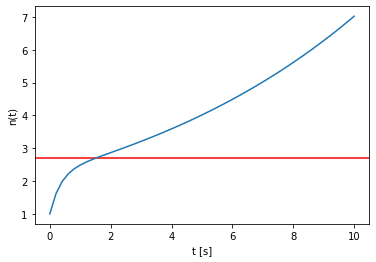

In [39]:
#set of differential equations odeint
def density_1_group(y,t):
    n, C = y
    dydt = [k*(rho-beta)*n/lp+lamb*C, k*beta*n/lp-lamb*C]
    return dydt

#rho>0  #positive reactivity
beta = 0.0065 # beta
rho = 0.60*beta #reactivity
k = 1/(1-rho) #multiplication factor
lp = 0.001 # prompt neutron lifetime
lamb = 0.08 # average neutron decay rate 

y0 = [1,beta/(lp*lamb)] # initial conditions, initial neutron number and precursor concentration

t = np.linspace(0,10) #time interval
y = odeint(density_1_group,y0,t) #result [n(T),C(T)]

yy=[x[0] for x in y]


plt.xlabel("t [s]")
plt.ylabel("n(t)")
plt.axhline(y=mt.e, color='r', linestyle='-')
plt.plot(t,yy)


print("Which suggests that the reactor T ~ 2 s, calculated for one averaged group of delayed neutrons.")

#### Now, let us assess (graphical method) the reactor period for 6 groups of delayed neutrons:

Which suggests that the reactor T ~ 1 s, calculated for 6 groups of delayed neutrons.


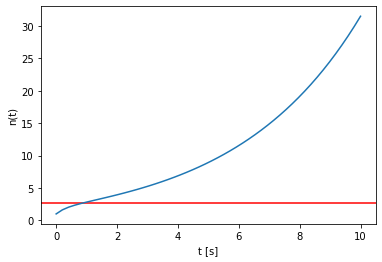

In [44]:
#set of differential equations odeint
#rho>0  #positive reactivity
beta = 0.0065 # beta
rho = 0.60*beta #reactivity
k = 1/(1-rho) #multiplication factor
lp = 0.001 # prompt neutron lifetime

#data from lecture 7
lamb1 = 0.0124
beta1 = 0.000215
lamb2 = 0.0305
beta2 = 0.001424
lamb3 = 0.111
beta3 = 0.001274
lamb4 = 0.301
beta4 = 0.002568
lamb5 = 1.14
beta5 = 0.000748
lamb6 = 3.01
beta6 = 0.000273

y0 = [1,beta1/(lp*lamb1),beta2/(lp*lamb2),beta3/(lp*lamb3),beta4/(lp*lamb4),beta5/(lp*lamb5),beta6/(lp*lamb6)] # 6 initial conditions


def density_6_groups(y,T):
    n, C1, C2, C3, C4, C5, C6 = y
    dYdT = [k*(rho-beta)*n/lp+lamb1*C1+lamb2*C2+lamb3*C3+lamb4*C4+lamb5*C5+lamb6*C6, k*beta1*n/lp-lamb1*C1, 
            k*beta2*n/lp-lamb2*C2, k*beta3*n/lp-lamb3*C3, k*beta4*n/lp-lamb4*C4, k*beta5*n/lp-lamb5*C5, k*beta6*n/lp-lamb6*C6]
    return dYdT



t = np.linspace(0,10) #time interval
y = odeint(density_6_groups,y0,t) #result [n(T),C(T)]

yy=[x[0] for x in y]


plt.xlabel("t [s]")
plt.ylabel("n(t)")
plt.axhline(y=mt.e, color='r', linestyle='-')
plt.plot(t,yy)


print("Which suggests that the reactor T ~ 1 s, calculated for 6 groups of delayed neutrons.")

### The reactor periods obtained using both methods differ roughly by the factor of 2.

## Problem 5.2

The overall temperature coefficient of a $^{235}U$-fueled reactor is $-2.75\cdot10^{-5}/^{\circ}C$ and is independent of temperature. By how much does the reactivity of the system drop when its temperature is
increased from room temperature, $20^{\circ}C$, to the operating temperature of $290^{\circ}C$? Give your
answer in pcm and dollars.

The temperature coefficient of reactivity $\alpha$ is defined as:

$$\alpha=\frac{d \rho}{dt}.$$

Since $\rho$ is independent of  temperature we can write:

$$\alpha=\frac{\Delta \rho}{\Delta t}.$$

Consequently, for $\Delta t = 270 K$ we have:

$$\Delta \rho=\alpha \Delta t= -2.75 \cdot 10^{-5} \cdot 270 = -742.5 \text{ pcm}.$$

Knowing the fraction of delayed neutrons for $U^{235}$, which is $\beta=0.0065$, we can calculate the change of reactivity in dollars:

$$\frac{\Delta \rho}{\beta} \approx -1.14 \text{ \$}.$$

## Problem 5.3

Calculate the equilibrium concentration, in $\text{atoms}/cm^{3}$, of $^{135}Xe$ and $^{135}I$ in an infinite critical
thermal reactor consisting of a homogeneous mixture of $^{235}U$ and $H_{2}O$ operating at a
temperature of $20^{0}C$ (here I changed temperature from $200^{\circ}C$, I believe you made a mistake here) and a thermal flux of $5\cdot10^{13}$ $\text{neutrons}/cm^{2}s$. The reactor is
characterized by the resonance escape probability $0.86$ and the fast fission factor $1.025$. The
microscopic capture cross-section of $^{135}Xe$ is $2.75\cdot10^{6}b$ at $2200 m/s$ flux. The thermal
macroscopic absorption cross-section of water is measured to be $1.86\cdot10^{-2}cm^{-1}$.

$$f=\frac{1}{\nu p \epsilon}$$

$$f=\frac{\Sigma_{a,F}}{\Sigma_{a,F}+\Sigma_{a,M}}$$

$$\Sigma_{a,F}=\frac{f\Sigma_{a,M}}{(1-f)}$$

$$\Sigma_{f}=\frac{k}{p\epsilon \nu}\left(\frac{f}{(1-f)}+1\right)\Sigma_{a,M}$$

$$N_{Xe,\infty}=\frac{(\gamma_{I}+\gamma_{Xe})\Sigma_{f} \phi_{th}}{\lambda_{Xeff}}=\frac{(\gamma_{I}+\gamma_{Xe})\Sigma_{f}\phi_{th}}{\lambda_{Xe}+\sigma_{a,Xe}\phi_{th}}$$

$$N_{I,\infty}=\frac{\gamma_{I}\Sigma_{f}\phi_{th}}{\lambda_{I}}$$

## Problem 5.4

A hypothetical critical "paper reactor" uses a uranium fuel with $5\%$ $^{235}U$ and $95\%$ $^{238}U$.
How would the factors of the 6 factor formula be affected if the fuel was switched to MOX fuel
$7\%$ $^{239}Pu$ - and $93\%$ $^{238}U$? (Weapon grade plutonium utilization concept)

In [ ]:
#Boring

# Set 6

## Problem 6.1

#### Identify and explain the differences between fission and fusion energy. Can fission and fusion work together? Why fusion may need fission?

source: https://en.wikipedia.org/wiki/Nuclear_fission

$\textbf{Fission}$ is a process in which the nucleus of an atom splits into two or more smaller nuclei.

source: lecture 9

$\textbf{Fusion}$ - the controlled process in
which two light atoms are fused
together generating a heavier atom
with the aim of generating energy

Let us now have a look at one of the most often considered fusion reactions:
$$^{2}_{1}D+^{3}_{1}T\rightarrow ^{4}_{2}He+^{1}_{0}n+17.56MeV.$$

reference: https://www.iter.org

According to ITER "propaganda-filled" official webpage: "Fusing atoms together in a controlled way releases nearly four million times more energy than a chemical reaction such as the burning of coal, oil or gas and four times as much as nuclear fission reactions (at equal mass)." 

It turns out that 1 kg of a Deuterium/Tritium mixture could be potentially used to generate power. According to the lecture it can generate power of $4GW$ per 24 hours.

Unfortunately, whereas Deuterium is abundant in nature, when it comes to Tritium, it is euphemistically speaking as rare as hen's teeth. The current known natural supply of tritium is estimated at twenty kilos, and thus Tritium must be artificially produced.

The way in which Tritium can be produced was described in lecture 9 slaid 15 (Lithium fission). Namely, Tritium can be bread from Lithium:

(egzothermic) $$^{6}_{3}Li+^{1}_{0}n\rightarrow ^{4}_{2}He+^{3}_{1}T+4.8MeV,$$ 

(endothermic) $$^{7}_{3}Li+^{1}_{0}n\rightarrow ^{4}_{2}He+^{3}_{1}T+^{1}_{0}n-2.5MeV.$$ 

Even though, the neutrons released in fusion reaction can be used for Tritium production in the aforementioned reactions, there is huge obstacle to overcome. To maintain the Tritium production from Lithium fission in a fusion reactor one has to utilize neutrons with $100\%$ efficiency, which is impossible (see lecture slide 15).

The availability of Lithium on land is sufficient for at least 1000 if not 30000
years, and the cost per kWh would be even smaller than that of Deuterium, which is very good!


The future of fusion reactors such as ITER depend on our ability to develop a successful method of tritium breeding.

Fusion power reactors are extremly expensive, and none of them has produced net energy so far. However, the potential energy gain from deploying fusion instead of fission is so great that there is still plenty of interest in this thechnology and experiments such as ITER have secure funding.

###### (APPENDIX to 6.1 advantages of fusion reactors)

The advantages of fusion reactors are aplenty (cite: https://www.iter.org):

$\textbf{No }CO_{2}$: Fusion doesn't emit harmful toxins like carbon dioxide or other greenhouse gases into the atmosphere. Its major by-product is helium: an inert, non-toxic gas.

$\textbf{No long-lived radioactive waste}$: Nuclear fusion reactors produce no high activity, long-lived nuclear waste. The activation of components in a fusion reactor is low enough for the materials to be recycled or reused within 100 years.

$\textbf{Limited risk of proliferation}$: Fusion doesn't employ fissile materials like uranium and plutonium. (Radioactive tritium is neither a fissile nor a fissionable material.) There are no enriched materials in a fusion reactor like ITER that could be exploited to make nuclear weapons.

$\textbf{No risk of meltdown}$: A Fukushima-type nuclear accident is not possible in a tokamak fusion device. It is difficult enough to reach and maintain the precise conditions necessary for fusion—if any disturbance occurs, the plasma cools within seconds and the reaction stops. The quantity of fuel present in the vessel at any one time is enough for a few seconds only and there is no risk of a chain reaction.

$\textbf{Cost}$:  The power output of the kind of fusion reactor that is envisaged for the second half of this century will be similar to that of a fission reactor, (i.e., between 1 and 1.7 gigawatts). The average cost per kilowatt of electricity is also expected to be similar ... slightly more expensive at the beginning, when the technology is new, and less expensive as economies of scale bring the costs down.

## Problem 6.2

#### Compare the solar (stellar) fusion cycle with the proposed "terrestial" solutions.

$\textbf{reference}$: lecture 9 slide 50.
    
The type of reactions that are considered for energy production are different + different source of confinement
(gravitational, magnetic, inertial).

I think you could paste here the image from the lecture with solar fusion, or present it here in any other way.

## Problem 6.3

#### Compare magnetic and inertial confinement fusion concepts.  



#### the best source (for the course)

The best source to answer could be lecture 9 slide 28-29.

There are two approaches to fusion.
One is based on the rapid
compression, and heating of a
solid fuel pellet through the use
of laser or particle beams. In
this approach one tries to
obtain a sufficient amount of
fusion reactions before the
material flies apart, hence the
name, inertial confinement
fusion (ICF).

Magnetic confinement:
The Lorentz force connected with a magnetic field makes that the
charged particles can not move over large distances across the
magnetic field
They gyrate around the field lines with a typical radius

Magnetic field
If no magnetic field is used for confinement

• The energy confinement time is unrealistically small

• The material walls will have to withstand the plasma

pressure

• The wall would have to stand an enormous heat flux due
to the large flux of energetic particles to the wall.

##### second best source:

The second best source is as always:

http://hyperphysics.phy-astr.gsu.edu/hbase/NucEne/fusmag.html


http://hyperphysics.phy-astr.gsu.edu/hbase/NucEne/finert.html#c1


It is one of the best sources because it actually explains how this stuff works.

##### Below some interesting statements from the depths of the internet!

cite: Paul Breeze, in Power Generation Technologies (Third Edition), 2019 (https://www.sciencedirect.com/topics/engineering/magnetic-confinement)

While magnetic confinement seeks to create as stable continuous plasma in which fusion can take place, the alternative, inertial confinement, seeks instead to generate energy from a series of discrete fusion reactions producing a burst of energy each time. In an inertial confinement reactor, small capsules containing around 150 mg of a mixture of deuterium and hydrogen are exposed to a massive pulse of energy from multiple lasers. When the laser beams strike the capsule, they create an explosion of X-rays from its surface, and these in turn (by the mechanical principle of action and reaction) create a pressure pulse that heats and compresses the DT mixture with such vigour that the conditions for fusion are generated at its core. One fusion starts, the reaction radiates outwards through the DT mixture faster than the actual molecules can expand and escape (they are ‘confined’ by their inertia) and so the whole charge undergoes fusion and releases a pulse of energy. 

To make this into a means of generating power, these small exploding suns must be created at a relatively rapid rate of perhaps 15 each second. This sounds both exacting and ambitious, but it is exactly what a US programme proposes. To achieve it, the US government has built the National Ignition Facility (NIF), a $5 billion project that is intended to serve both military and civilian research.

NIF is provided with 192 lasers capable of providing a combined pulse of up to 5 MJ of energy, and it has so far produced 2.2 MJ, equivalent to a delivery rate of 500 TW of energy. All the energy contained in the laser beams is focussed onto the 150 mg of DT. NIF is only capable of single shot experiments rather than the continuous operation required for a power plant. Since it started in 2009, it has carried out a series of experiments trying to achieve ignition, the point at which the DT produces more fusion energy than the lasers pump into it. By 2015, it was a factor or two or three short of ignition.

Alongside NIF is the Laser Inertial Fusion Energy (LIFE) project, a collaboration of scientists, technologists, utilities and regulators who are seeking to design a power plant capable of exploiting inertial confinement. Current plants see a demonstration project constructed between 2020 and 2030 and commercial plants available by 2030 or soon afterwards.



Another interesting source:
    
https://science.howstuffworks.com/fusion-reactor3.html
    
$\textbf{Magnetic confinement}$ uses magnetic and electric fields to heat and squeeze the hydrogen plasma. The ITER project in France is using this method.

$\textbf{Inertial confinement}$ uses laser beams or ion beams to squeeze and heat the hydrogen plasma. Scientists are studying this experimental approach at the National Ignition Facility of Lawrence Livermore Laboratory in the United States.

## Problem 6.4

#### Environmental aspects of energy from fusion.

This webpage has a very good description of the environmental aspects of fusion energy production: https://www.iter.org/mach/safety.

You could also just rephrase the Appendix to 6.1.